In [151]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single datasetr
ride_average=ride_df.groupby('city')["fare"].mean()
ride_count = ride_df.groupby('city')["ride_id"].count()

new_city_df=pd.merge(ride_average,ride_count,on="city",how="outer")
df=pd.merge(new_city_df,city_df, on="city")

# Display the data table for preview
#df["driver_count"].max()
#df["driver_count"].min()
df.head()

,city,fare,ride_id,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


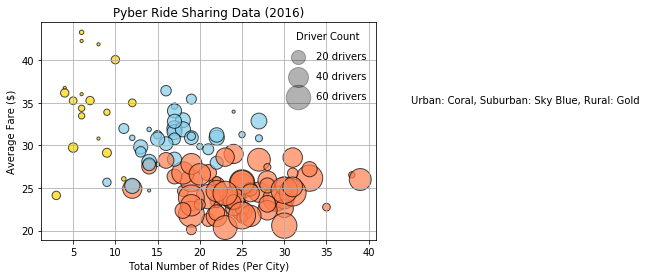

In [167]:
# Obtain the x and y coordinates for each of the three city types

x_axis = df["ride_id"]
y_axis=df['fare']
s=df['driver_count']
colors = dict({"Urban":"Coral","Suburban":"SkyBlue","Rural":"Gold"})
c=[ colors[i] for i in df['type']]

# Build the scatter plots for each city types

plt.scatter(x_axis, y_axis, s=10*s, c=c, alpha=0.7, edgecolors="black", linewidth=1, label=None)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Create a legend
#plt.legend()
plt.text(45, 35, 'Urban: Coral,Suburban: Sky Blue, Rural: Gold', fontsize=10)
# Incorporate a text label regarding circle size

for s in [20, 40, 60]:
    plt.scatter([], [], c='k', alpha=0.3, s=10*s,
                label=str(s) + ' drivers')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Driver Count')

# Save Figure
plt.savefig("./RideShare.png")
plt.show()

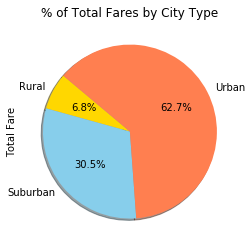

In [186]:
# Calculate Type Percents
new_df=df
new_df["total_fare"]=df["fare"]*df["ride_id"]
total_df=new_df.groupby('type')["total_fare"].sum()
# Build Pie Chart
total_pie = total_df.plot(kind="pie",title = "% of Total Fares by City Type",colors=["Gold","SkyBlue","Coral"],autopct="%1.1f%%", shadow=True, startangle=140)

total_pie.set_ylabel("Total Fare")
# Save Figure
plt.savefig("./PieTotalFare.png")
plt.show()


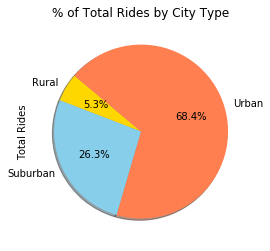

In [195]:

total_rides_df=new_df.groupby('type')["ride_id"].sum()
# Build Pie Chart
total_pie = total_rides_df.plot(kind="pie",title = "% of Total Rides by City Type",colors=["Gold","SkyBlue","Coral"],autopct="%1.1f%%", shadow=True, startangle=140)

total_pie.set_ylabel("Total Rides")
# Save Figure
plt.savefig("./PieRides.png")
plt.show()

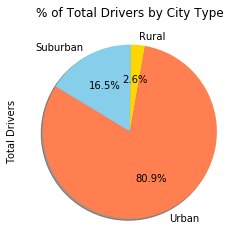

In [192]:
total_drivers_df=new_df.groupby('type')["driver_count"].sum()
# Build Pie Chart
total_pie = total_drivers_df.plot(kind="pie",title = "% of Total Drivers by City Type",colors=["Gold","SkyBlue","Coral"],autopct="%1.1f%%", shadow=True, startangle=80)

total_pie.set_ylabel("Total Drivers")
# Save Figure
plt.savefig("./PieDrivers.png")
plt.show()